In [15]:
import pandas as pd
import numpy as np
from DS_WCS_projections import *
from DS_data_transformation import *
import DS_Coma_Cluster_param as cc_prm
from DS_healpix_fragmentation import radec2pix
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm.notebook import tqdm
from skimage.draw import circle
from matplotlib import pyplot as plt

In [2]:
wcs = custom_wcs(cc_prm.ra_center, cc_prm.dec_center)

/home/rt2122/L/git/data-segmentation-2/modules/DS_WCS_projections.py:39: RuntimeWarning: cdelt will be ignored since cd is present
  w1.wcs.cdelt = w.wcs.cdelt[:2]


In [4]:
pic = np.zeros((2048, 2048, 6))

In [6]:
def planck_pic(arr, fits_name, wcs):
    data = None
    planck_nside = 2048
    with fits.open(fits_name) as hdul:
        data = np.array(hdul[1].data['I_STOKES'])
    for i in tqdm(range(arr.shape[0])):
        coords = wcs.all_pix2world(np.full(2048, i), np.arange(2048), 0)
        pix = radec2pix(coords[0], coords[1], planck_nside)
        arr[i] = data[pix]

In [12]:
planck_pic(pic[:,:,0], '/home/rt2122/Data/Planck/HFI_SkyMap_100_2048_R3.01_full.fits',
          wcs)

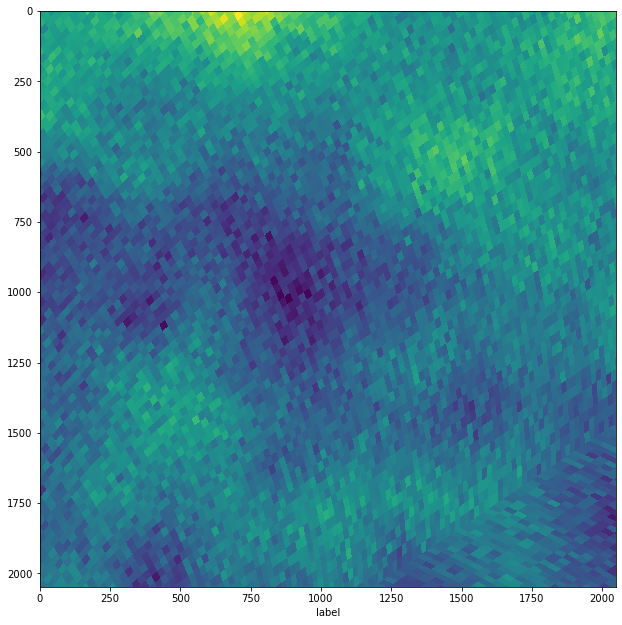

In [11]:
pic[:,:,0] -=pic[:,:,0].min()
pic[:,:,0] /=pic[:,:,0].max()
show_pic(pic[:,:,0])

In [13]:
def get_cont(mask):
    import cv2
    return cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)[1][0]

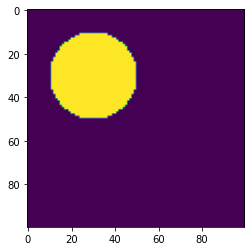

In [16]:
ex = np.zeros((100, 100))
ex[circle(30, 30, 20, shape=(100, 100))] = 1
plt.imshow(ex)

In [17]:
ex1 = np.zeros((100, 100))
ex1[get_cont(ex)] = 1
plt.imshow(ex1)

ModuleNotFoundError: No module named 'cv2'